# Dataklub 2025 nyári kihívás

# Dinamikus koncepció

In [ ]:
# 2025.08.31.

In [1]:
 ############### ADATDOKI függvényei   ###############
 ############### TZ_functions.py       ###############
!git clone https://github.com/adatdoki/tz_functions.py.git
%cd tz_functions.py
import sys
sys.path.append('/content/tz_functions.py')

from tz_functions import *
%cd /content/

Cloning into 'tz_functions.py'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 94 (delta 30), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 42.25 KiB | 2.64 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/tz_functions.py
 ############### ADATDOKI függvényei   ############### 
 ############### TZ_functions.py       ############### 
 ############### version = 2025.03.15. ############### 
/content


1. #### 1. Sajtoszemle AI Demo - Colab verzió (váz)

In [2]:
# === VERZIÓ: 20.0 | 2025-08-30 11:25 UTC ===
#=========================================
# Sajtoszemle AI Demo - Colab verzió (váz)
# =========================================

# -- 1. Setup: csomagok telepítése --
!pip install -q feedparser requests beautifulsoup4 tqdm openai rich datetime

import os
import requests
import feedparser
from bs4 import BeautifulSoup
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import urllib3
from getpass import getpass

# SSL hibák tiltása (Colabban néha kell)
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# -- OpenAI API kulcs bekérés --
os.environ["OPENAI_API_KEY"] = getpass("Add meg az OpenAI API kulcsot: ")

import openai
openai.api_key = os.environ["OPENAI_API_KEY"]


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 13.2 MB/s eta 0:00:00
Add meg az OpenAI API kulcsot: ··········


#### # -- 2. Konfiguráció, paraméterek --

In [106]:
# === VERZIÓ: 21.0 | 2025-08-31 16:25 ===
# -- 2. Konfiguráció --
CFG = {
    "VERBOSE": True,                           # részletes log
    "DEBUG_LIMIT": 15,                          # teszt: ennyi hír max. feldolgozva (None = nincs limit)
    "SUMMARY_SENTENCES": 5,                    # összefoglaló hossza
    "SUMMARY_LINES": 10,                        # sorok száma (opcionális)
    "SUMMARY_PREVIEW_CHARS": 500,              # összefoglaló log kiírás hossza
    "SUMMARY_WRAP_CHARS": 140,                 # sortördelés szélessége logban
    "SEPARATOR_LEN": 110,                      # elválasztó hossza
    "USE_INVERT_TITLE": True,                  # címek inverz kiemelése
    "PROGRESS_MININTERVAL": 10,                # progress bar frissítés időköze mp-ben
    "SHOW_RSS_SUMMARY": True,                  # RSS összefoglaló kiírása
    "SHOW_AI_SUMMARY": True,                   # AI összefoglaló kiírása
    "TITLE_WIDTH": 120,                        # címsor max. szélessége
    "SENTIMENT_SHORT": True,                   # csak az első szó legyen kiírva

    # --- Színek ---
    "SENTIMENT_COLORS": {
        "Pozitív": "bold green3",
        "Negatív": "bold red",
        "Semleges": "bold yellow",
        "Aggodalom": "bold red",
        "Optimizmus": "bold green3",
        "Semlegesség": "bold yellow",
    },
    "SUMMARY_COLORS": {
        "RSS": "bold cyan",
        "AI": "bold blue"
    },
    "COST_COLOR": "#264444 on #FFDDDD",     # összesítő blokk háttere
    "COST_LOG_COLOR": "#264444 on #FFDDDD", # egyes AI hívások költség logja

    # --- Költség beállítások ---
    "AI_COST_STYLE": "#264444 on #444444",  # AI hívások kiírásának stílusa
    "AI_COST_CURRENCY": "HUF",                 # lehet: "USD", "EUR", "HUF"
}


In [ ]:
# === VERZIÓ: 21.0 | 2025-08-31 16:25 ===
# -- 2.1 DEMO Konfiguráció -- garantáltan fut, kevés adattal !!!!!!!!!!!!!!!!!
CFG = {
    "VERBOSE": True,                           # részletes log
    "DEBUG_LIMIT": 5,                          # teszt: ennyi hír max. feldolgozva (None = nincs limit)
    "SUMMARY_SENTENCES": 3,                    # összefoglaló hossza
    "SUMMARY_LINES": 5,                        # sorok száma (opcionális)
    "SUMMARY_PREVIEW_CHARS": 500,              # összefoglaló log kiírás hossza
    "SUMMARY_WRAP_CHARS": 140,                 # sortördelés szélessége logban
    "SEPARATOR_LEN": 120,                      # elválasztó hossza
    "USE_INVERT_TITLE": True,                  # címek inverz kiemelése
    "PROGRESS_MININTERVAL": 10,                # progress bar frissítés időköze mp-ben
    "SHOW_RSS_SUMMARY": True,                  # RSS összefoglaló kiírása
    "SHOW_AI_SUMMARY": True,                   # AI összefoglaló kiírása
    "TITLE_WIDTH": 120,                        # címsor max. szélessége
    "SENTIMENT_SHORT": True,                   # csak az első szó legyen kiírva

    # --- Színek ---
    "SENTIMENT_COLORS": {
        "Pozitív": "bold green3",
        "Negatív": "bold red",
        "Semleges": "bold yellow",
        "Aggodalom": "bold red",
        "Optimizmus": "bold green3",
        "Semlegesség": "bold yellow",
    },
    "SUMMARY_COLORS": {
        "RSS": "bold cyan",
        "AI": "bold blue"
    },
    "COST_COLOR": "#264444 on #FFDDDD",     # összesítő blokk háttere
    "COST_LOG_COLOR": "#264444 on #FFDDDD", # egyes AI hívások költség logja

    # --- Költség beállítások ---
    "AI_COST_STYLE": "#264444 on #444444",  # AI hívások kiírásának stílusa
    "AI_COST_CURRENCY": "HUF",                 # lehet: "USD", "EUR", "HUF"
}


#### 2.1 CELLÁBAN: Futási statikus paraméterek

In [83]:
# === VERZIÓ: 21.0 | 2025-08-31 18:30 UTC ===
# =======================================================
# 2.1 CELLÁBAN: Futási statikus paraméterek
# =======================================================

from pathlib import Path

# --- Kulcsszavak ---
kulcsszavak = [
    'kommunista',
    'szocialista',
    'kommunizmus',
    'szocializmus',
    '"nemzeti emlékezet bizottsága"',
    'történész',
    'NEB',
    'NEB Hivatala',
    'elhunyt',
    'meghalt',
    'temetés',
    '"M Kiss Sándor"',
    '"Bank Barbara"',
    '"Kiss Réka"',
    '"Földváryné"',
    '"Földváryné Kiss Réka"',
    '"Rabóczki Bence"',
    '"Soós Viktor Attila"',
    '"Ötvös István"'
]

with open("kulcsszavak.txt", "w", encoding="utf-8") as f:
    for kw in kulcsszavak:
        f.write(kw + "\n")
print(f"📑 Kulcsszavak kiírva: {len(kulcsszavak)} db → kulcsszavak.txt")

# --- RSS források ---
hirforrasok = [
    'https://www.origo.hu/publicapi/hu/rss/origo/articles',
    'https://www.origo.hu/publicapi/hu/rss/origo/nagyvilag/articles',
    'https://www.origo.hu/publicapi/hu/rss/origo/tudomany/articles',
    'https://www.origo.hu/publicapi/hu/rss/origo/itthon/articles',
    'https://www.origo.hu/publicapi/hu/rss/origo/sport-egyeni/articles',
    'https://index.hu/24ora/rss',
    'https://hvg.hu/egyeb/rss',
    'http://neb.hu/rss/',
    'https://port.hu/rss/magazin',
    'https://kultura.hu/feed/',
    'https://filmtekercs.hu/feed/',
    'https://www.idokep.hu/rss',
    'http://444.hu/feed/',
    'https://demokrata.hu/feed/',
    'http://www.hirado.hu/mobil.aspx',
    'http://hvg.hu/rss/itthon',
    'http://www.inforadio.hu/rss/all/',
    'https://www.hirstart.hu/site/publicrss.php?pos=fokoteg&pid=98&fid=6974',
    'http://www.magyarkurir.hu/rss/',
    'http://pestisracok.hu/feed/',
    'http://ujkor.hu/feed',
    'https://www.valaszonline.hu/feed/',
    'https://MEDIAKLIKK.HU',
    'http://www.inforadio.hu/rss/all/',
    'http://24ora.index.hu/?rss&&rovatkeres=osszes',
    'http://objektivhir.hu/rss.xml',
    'http://www.hirtv.hu/backend.php',
    'http://fullextra.com/backend.php',
]

with open("hirforrasok.txt", "w", encoding="utf-8") as f:
    for h in hirforrasok:
        f.write(h + "\n")
print(f"📑 RSS források kiírva: {len(hirforrasok)} db → hirforrasok.txt")

# --- Scrap források ---
scrap_urls = [
    "http://neb.hu/hu/hirek",
    "http://www.abtl.hu/hirek/",
    "http://bparchiv.hu/fooldal/hirek/",
    "http://gulagalapitvany.hu/esemenyek/",
    "http://hdke.hu/hirek/",
    "http://militaria.hu/kiallitasok",
    "http://www.knbsz.gov.hu/hu/rendezvenyek.html",
    "https://portal.kre.hu/index.php/sajto/sajtokozlemenyek.html",
    "http://kkjm.hu/naptar",
    "http://www.kshkonyvtar.hu/list/blog/76",
    "https://ujkor.hu/",
    "https://mediaklikk.hu/",
    "https://hvg.hu/",
    "https://www.valaszonline.hu/",
    "https://demokrata.hu/",
    "https://www.facebook.com/nemzetiemlekezetbizottsaga/posts/",
    "https://www.youtube.com/watch",
]

with open("scrap_urls.txt", "w", encoding="utf-8") as f:
    for u in scrap_urls:
        f.write(u + "\n")
print(f"📑 Scrap források kiírva: {len(scrap_urls)} db → scrap_urls.txt")


📑 Kulcsszavak kiírva: 19 db → kulcsszavak.txt
📑 RSS források kiírva: 28 db → hirforrasok.txt
📑 Scrap források kiírva: 17 db → scrap_urls.txt


# 2.2 SZÍN KÍSÉRLETI MODUL – ANSI + HEX csúszkás előnézet

In [115]:
# === VERZIÓ: 21.1 | 2025-08-31 16:45 UTC ===
# =======================================================
# Színkód konfigurátor widget (CFG paraméterekhez)
# =======================================================

import ipywidgets as widgets
from IPython.display import display, HTML

# --- Hex <-> RGB ---
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip("#")
    return tuple(int(hex_code[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hex(r, g, b):
    return f"#{r:02X}{g:02X}{b:02X}"

# --- Sliderek ---
fg_r = widgets.IntSlider(0, 0, 255, description="FG R")
fg_g = widgets.IntSlider(0, 0, 255, description="FG G")
fg_b = widgets.IntSlider(0, 0, 255, description="FG B")
bg_r = widgets.IntSlider(0, 0, 255, description="BG R")
bg_g = widgets.IntSlider(0, 0, 255, description="BG G")
bg_b = widgets.IntSlider(0, 0, 255, description="BG B")

# --- Input mezők hex kódhoz ---
fg_input = widgets.Text(value="#000000", description="E:")
bg_input = widgets.Text(value="#FFFFFF", description="H:")

# --- Stílus opciók ---
bold_chk = widgets.Checkbox(value=False, description="Bold")
italic_chk = widgets.Checkbox(value=False, description="Italic")
underline_chk = widgets.Checkbox(value=False, description="Underline")

# --- Paraméterválasztó lenyíló ---
param_options = ["NINCS (kísérletezés)"]
for key, val in CFG.items():
    if isinstance(val, dict):
        for sub in val.keys():
            param_options.append(f"{key}.{sub}")
    else:
        param_options.append(key)

param_select = widgets.Dropdown(
    options=param_options,
    value="NINCS (kísérletezés)",
    description="Param:"
)

# --- Preview + kimeneti mező ---
preview_html = widgets.HTML()
result_label = widgets.HTML()
style_label = widgets.HTML("<i>Style string itt fog látszani...</i>")

# --- Beolvasás paraméterből ---
def load_from_cfg(param):
    """CFG paraméter értékének visszatöltése csúszkákba + checkboxokba"""
    if param.startswith("NINCS"):
        return
    try:
        if "." in param:
            main, sub = param.split(".")
            style_str = CFG[main][sub]
        else:
            style_str = CFG[param]
    except:
        return

    # Bold/Italic/Underline reset
    bold_chk.value = "bold" in style_str
    italic_chk.value = "italic" in style_str
    underline_chk.value = "underline" in style_str

    # Színek kivétele
    parts = style_str.split()
    fg_hex, bg_hex = "#000000", "#FFFFFF"
    for i, p in enumerate(parts):
        if p == "on" and i > 0 and i < len(parts)-1:
            fg_hex = parts[i-1] if parts[i-1].startswith("#") else fg_hex
            bg_hex = parts[i+1] if parts[i+1].startswith("#") else bg_hex

    # HEX input mezők
    fg_input.value = fg_hex
    bg_input.value = bg_hex

    # Csúszkák
    try:
        r,g,b = hex_to_rgb(fg_hex); fg_r.value, fg_g.value, fg_b.value = r,g,b
    except: pass
    try:
        r,g,b = hex_to_rgb(bg_hex); bg_r.value, bg_g.value, bg_b.value = r,g,b
    except: pass

# --- Frissítés funkció ---
def update_display(change=None):
    fg_hex = rgb_to_hex(fg_r.value, fg_g.value, fg_b.value)
    bg_hex = rgb_to_hex(bg_r.value, bg_g.value, bg_b.value)

    fg_input.value = fg_hex
    bg_input.value = bg_hex

    # ANSI style string összeállítása
    style_parts = []
    if bold_chk.value: style_parts.append("bold")
    if italic_chk.value: style_parts.append("italic")
    if underline_chk.value: style_parts.append("underline")
    style_parts.append(f"{fg_hex} on {bg_hex}")
    style_str = " ".join(style_parts)

    selected = param_select.value
    if selected.startswith("NINCS"):
        target_info = "⚠️ Kísérletezés – nem állít be semmit"
        panel_bg = "#EEEEEE"
    else:
        if "." in selected:
            main, sub = selected.split(".")
            CFG[main][sub] = style_str
            target_info = f'CFG["{main}"]["{sub}"] = "{style_str}"'
        else:
            CFG[selected] = style_str
            target_info = f'CFG["{selected}"] = "{style_str}"'
        save_cfg()
        panel_bg = bg_hex

    # Preview
    preview_html.value = f"""
    <div style="padding:10px; background:{bg_hex}; color:{fg_hex};
                font-weight:{'bold' if bold_chk.value else 'normal'};
                font-style:{'italic' if italic_chk.value else 'normal'};
                text-decoration:{'underline' if underline_chk.value else 'none'};">
        Mintaszöveg – {style_str}
    </div>
    """
    result_label.value = f"<div style='background:{panel_bg}; padding:4px;'>{target_info}</div>"
    style_label.value = f"<code>{style_str}</code>"

# --- HEX mezőkből töltsük vissza a csúszkákat ---
def apply_hex_inputs(b):
    try:
        r, g, b_val = hex_to_rgb(fg_input.value)
        fg_r.value, fg_g.value, fg_b.value = r, g, b_val
    except: pass
    try:
        r, g, b_val = hex_to_rgb(bg_input.value)
        bg_r.value, bg_g.value, bg_b.value = r, g, b_val
    except: pass
    update_display()

apply_btn = widgets.Button(description="OK", button_style="success")
apply_btn.on_click(apply_hex_inputs)

# --- Lenyíló változáskor töltsön be ---
def on_param_change(change):
    load_from_cfg(change["new"])
    update_display()

param_select.observe(on_param_change, names="value")

# --- Change listener minden másra ---
for w in [fg_r, fg_g, fg_b, bg_r, bg_g, bg_b,
          bold_chk, italic_chk, underline_chk]:
    w.observe(update_display, names="value")

# --- Layout ---
ui = widgets.VBox([
    widgets.HBox([fg_r, fg_g, fg_b]),
    widgets.HBox([bg_r, bg_g, bg_b]),
    widgets.HBox([fg_input, bg_input, apply_btn]),
    widgets.HBox([bold_chk, italic_chk, underline_chk]),
    param_select,
    preview_html,
    result_label,
    style_label
])

display(ui)
update_display()


#### 2.4 – KÖLTSÉGKÖVETŐ + KÖZPONTI AI HÍVÓ MODUL

In [112]:
# === VERZIÓ: 20.0 | 2025-08-31 15:45 UTC ===
# =======================================================
# 2.4 – KÖLTSÉGKÖVETŐ + KÖZPONTI AI HÍVÓ MODUL
# =======================================================

import os, json, inspect
from datetime import datetime
from openai import OpenAI

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

# Modell árak (USD / 1K token) – pontos bontással
MODEL_PRICES = {
    "gpt-4o-mini": {"prompt": 0.00015, "completion": 0.0006},
    "gpt-4o": {"prompt": 0.0025, "completion": 0.01},
    "text-embedding-3-small": {"prompt": 0.00002, "completion": 0.0},
    "text-embedding-3-large": {"prompt": 0.00013, "completion": 0.0},
}

# --- Költségnapló fájl ---
COST_FILE = "cost_log.json"

if os.path.exists(COST_FILE):
    with open(COST_FILE, "r", encoding="utf-8") as f:
        COST_LOG = json.load(f)
else:
    COST_LOG = []   # lista: {"time": "...", "usd": ...}

# =======================================================
# KÖLTSÉGKEZELÉS
# =======================================================

def track_cost(resp, model_name="gpt-4o-mini"):
    """Tokenhasználat és költség kiírása + naplózása"""
    try:
        if not hasattr(resp, "usage"):
            console.print("⚠️ Nincs usage mező a válaszban.", style="bold red")
            return

        usage = resp.usage
        prompt_toks = getattr(usage, "prompt_tokens", 0)
        comp_toks = getattr(usage, "completion_tokens", 0)
        total_toks = getattr(usage, "total_tokens", prompt_toks + comp_toks)

        prices = MODEL_PRICES.get(model_name, {"prompt": 0.0, "completion": 0.0})
        cost_usd = (prompt_toks / 1000) * prices["prompt"] + (comp_toks / 1000) * prices["completion"]

        # --- Átváltás CFG-ben megadott pénznemre ---
        currency = CFG.get("AI_COST_CURRENCY", "USD")
        rate = EXCHANGE_RATES.get(currency, 1.0)
        symbol = CURRENCY_SYMBOLS.get(currency, currency)
        cost_conv = cost_usd * rate

        frame = inspect.currentframe().f_back
        caller_info = f"[{frame.f_code.co_name} @ {frame.f_code.co_filename}:{frame.f_lineno}]"

        COST_LOG.append({
            "time": datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S"),
            "model": model_name,
            "prompt_tokens": prompt_toks,
            "completion_tokens": comp_toks,
            "total_tokens": total_toks,
            "cost_usd": cost_usd,
            "caller": caller_info
        })

        console.print(
            f"💰 {model_name} hívás költsége: {cost_conv:.6f} {symbol} "
            f"({total_toks} token: {prompt_toks} prompt + {comp_toks} completion)",
            style=CFG.get("COST_LOG_COLOR", "bold white on #444444")
        )
        console.print(f"\t{caller_info}", style="dim")

    except Exception as e:
        console.print(f"⚠️ Költség naplózás hiba: {e}", style="bold red")

# Árfolyamok
EXCHANGE_RATES = {"USD": 1.0, "EUR": 0.92, "HUF": 370.0}
CURRENCY_SYMBOLS = {"USD": "$", "EUR": "€", "HUF": "Ft"}

# =======================================================
# KÖLTSÉG ÖSSZESÍTŐ FUNKCIÓ
# =======================================================

def show_cost_summary(currency="USD", enabled=True):
    """
    Összes költség kiírása napi/heti/havi/éves bontásban.
    - currency: 'USD' / 'EUR' / 'HUF'
    - enabled: False → nem ír ki semmit
    """
    if not enabled:
        return

    if not COST_LOG:
        console.print("⚠️ Nem volt költség.", style=CFG.get("COST_COLOR", "bold black on #FFDDDD"))
        return

    # konverzió
    rate = EXCHANGE_RATES.get(currency, 1.0)
    symbol = CURRENCY_SYMBOLS.get(currency, currency)

    now = datetime.utcnow()

    def in_period(entry_time, period="day"):
        dt = datetime.strptime(entry_time, "%Y-%m-%d %H:%M:%S")
        if period == "day":
            return dt.date() == now.date()
        if period == "week":
            return dt.isocalendar()[1] == now.isocalendar()[1] and dt.year == now.year
        if period == "month":
            return dt.year == now.year and dt.month == now.month
        if period == "year":
            return dt.year == now.year
        return True

    daily = sum(e["usd"] for e in COST_LOG if in_period(e["time"], "day")) * rate
    weekly = sum(e["usd"] for e in COST_LOG if in_period(e["time"], "week")) * rate
    monthly = sum(e["usd"] for e in COST_LOG if in_period(e["time"], "month")) * rate
    yearly = sum(e["usd"] for e in COST_LOG if in_period(e["time"], "year")) * rate

    text = (
        f"Napi költség: {daily:.4f} {symbol}\n"
        f"Heti költség: {weekly:.4f} {symbol}\n"
        f"Havi költség: {monthly:.4f} {symbol}\n"
        f"Éves költség: {yearly:.4f} {symbol}\n"
    )

    console.print(text, style=CFG.get("COST_COLOR", "bold black on #FFDDDD"))


# =======================================================
# KÖZPONTI AI HÍVÓ FÜGGVÉNYEK
# =======================================================

# --- Sentiment normalizáló segédfüggvények ---
def _norm_classic_cached(val: str) -> str:
    """Régi cache-ből jövő klasszikus sentiment normalizálása rövid címkére"""
    t = (val or "").lower()
    if "negat" in t: return "Negatív"
    if "pozit" in t: return "Pozitív"
    if "semleg" in t: return "Semleges"
    return "Semleges"

def _norm_theme_cached(val: str) -> str:
    """Régi cache-ből jövő témahangulat normalizálása rövid címkére"""
    t = (val or "").lower()
    if "aggod" in t: return "Aggodalom"
    if "optim" in t: return "Optimizmus"
    if "semleg" in t: return "Semlegesség"
    return "Semlegesség"

def call_chat_model(prompt, model="gpt-4o-mini", temperature=0.2, max_tokens=300):
    """Központi chat hívás költségkövetéssel"""
    resp = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature,
        max_tokens=max_tokens
    )
    track_cost(resp, model)
    return resp.choices[0].message.content.strip()

def call_embedding_model(text, model="text-embedding-3-small"):
    """Központi embedding hívás költségkövetéssel"""
    resp = client.embeddings.create(model=model, input=text)
    track_cost(resp, model)
    return resp.data[0].embedding

# =======================================================
# SZAKASZOS AI SEGÉDFÜGGVÉNYEK
# =======================================================

# --- HELYETTE EZ LEGYEN A 2.4-BEN ---

def _map_classic_label(raw: str) -> str:
    """LLM-output → {Pozitív, Negatív, Semleges} (accent/nyelvi zajok ellen véd)"""
    t = (raw or "").lower()
    if "negat" in t:
        return "Negatív"
    if "pozit" in t:
        return "Pozitív"
    if "semleg" in t:
        return "Semleges"
    # fallback: ha nem található kulcsszó, default Semleges
    return "Semleges"

def _map_theme_label(raw: str) -> str:
    """LLM-output → {Aggodalom, Optimizmus, Semlegesség}"""
    t = (raw or "").lower()
    if "aggod" in t:
        return "Aggodalom"
    if "optim" in t:
        return "Optimizmus"
    if "semleg" in t:
        return "Semlegesség"
    return "Semlegesség"

# --- 2.4 modulban ---
def analyze_sentiment_classic(text, title=""):
    prompt = "Adj vissza egyetlen szót: Pozitív, Negatív vagy Semleges.\n\n" + text
    resp = call_chat_model(prompt, model="gpt-4o-mini", max_tokens=5)
    return _norm_classic_cached(resp)

def analyze_sentiment_theme(text, title=""):
    prompt = "Adj vissza egyetlen szót: Aggodalom, Optimizmus vagy Semlegesség.\n\n" + text
    resp = call_chat_model(prompt, model="gpt-4o-mini", max_tokens=5)
    return _norm_theme_cached(resp)

def summarize_text(text, sentences=3, lines=None, title=""):
    if lines:
        prompt = f"Foglalj össze {lines} sorban:\n\nSzöveg:\n{text}"
    else:
        prompt = f"Foglalj össze {sentences} mondatban:\n\nSzöveg:\n{text}"
    return call_chat_model(prompt, model="gpt-4o-mini", max_tokens=300)


In [85]:
# === VERZIÓ: 20.0 | 2025-08-30 11:25 UTC ===
# =======================================================
# 2.5. CELLÁBAN: Alap mappák és statikus fájlok előkészítése
# =======================================================
from pathlib import Path

# Alap könyvtárak
Path("presswatch_project/data/static").mkdir(parents=True, exist_ok=True)
Path("presswatch_project/gold_samples").mkdir(parents=True, exist_ok=True)

# Statikus forrásfájl elérési út
STATIC_FILE = Path("presswatch_project/data/static/hirforrasok.txt")

# Ha nincs, készítünk egy példa forráslistát
if not STATIC_FILE.exists():
    with open(STATIC_FILE, "w", encoding="utf-8") as f:
        f.write("HÍREK;444;https://444.hu/rss\n")
        f.write("HÍREK;Telex;https://telex.hu/rss\n")

print("📑 Alap mappák és statikus források előkészítve.")


📑 Alap mappák és statikus források előkészítve.


In [86]:
# === VERZIÓ: 20.0 | 2025-08-30 11:25 UTC ===
# =======================================================
# 2.6. CELLÁBAN: Gold samples feldolgozás (CSV cache előnyben)
# =======================================================

from pathlib import Path
import re
import pandas as pd

# --- Dinamikus listák alapból üresen ---
dynamic_links, dynamic_rss, dynamic_scrap = [], [], []

EXPORT_DIR = Path("presswatch_project/data/dynamic")
EXPORT_DIR.mkdir(parents=True, exist_ok=True)

# --- 1. Próbáljuk betölteni CSV-ből ---
def load_dynamic_data(export_dir=EXPORT_DIR):
    data = {"links": [], "rss": [], "scrap": []}
    try:
        if (export_dir / "dynamic_links.csv").exists():
            data["links"] = pd.read_csv(export_dir / "dynamic_links.csv")["url"].tolist()
        if (export_dir / "dynamic_rss.csv").exists():
            df = pd.read_csv(export_dir / "dynamic_rss.csv")
            data["rss"] = list(df.itertuples(index=False, name=None))
        if (export_dir / "dynamic_scrap.csv").exists():
            df = pd.read_csv(export_dir / "dynamic_scrap.csv")
            data["scrap"] = list(df.itertuples(index=False, name=None))
    except Exception as e:
        print(f"⚠️ Hiba a dinamikus adatok visszatöltésekor: {e}")
    return data

dynamic_data = load_dynamic_data()

if dynamic_data["links"]:
    dynamic_links = dynamic_data["links"]
    dynamic_rss = dynamic_data["rss"]
    dynamic_scrap = dynamic_data["scrap"]
    print(f"📥 Dinamikus adatok visszatöltve CSV-ből:")
    print(f"   - dynamic_links: {len(dynamic_links)} db")
    print(f"   - dynamic_rss:   {len(dynamic_rss)} db")
    print(f"   - dynamic_scrap: {len(dynamic_scrap)} db")

else:
    # --- 2. Ha nincs CSV, akkor dolgozzuk fel a gold_samples mappát ---
    def extract_urls_from_text(text: str):
        url_pattern = re.compile(r"https?://\S+")
        return url_pattern.findall(text)

    def find_and_sort_gold_samples(base_dir: Path):
        files = []
        if base_dir.exists():
            for ext in ("*.pdf", "*.txt"):
                files.extend(base_dir.glob(ext))
        return sorted(files, key=lambda x: x.stat().st_mtime, reverse=True)

    GOLD_SAMPLES_DIR = Path("presswatch_project/gold_samples")
    gold_samples = find_and_sort_gold_samples(GOLD_SAMPLES_DIR)

    if gold_samples:
        if CFG.get("VERBOSE", False):
            print(f"📥 Gold samples talált: {len(gold_samples)} fájl feldolgozása...")

        for f in gold_samples:
            try:
                text = f.read_text(encoding="utf-8", errors="ignore")
                urls = extract_urls_from_text(text)
                dynamic_links.extend(urls)

                for u in urls:
                    if "rss" in u.lower() or u.lower().endswith(".xml"):
                        dynamic_rss.append(("from_gold", u))
                    else:
                        base = "/".join(u.split("/")[:3])
                        dynamic_scrap.append((base, u))

            except Exception as e:
                if CFG.get("VERBOSE", False):
                    print(f"⚠️ Hiba a {f} feldolgozásakor: {e}")

        # Deduplikáció
        dynamic_links = list(set(dynamic_links))
        dynamic_rss = list(set(dynamic_rss))
        dynamic_scrap = list(set(dynamic_scrap))

        # --- 3. Mentés CSV-be ---
        pd.DataFrame(dynamic_links, columns=["url"]).to_csv(
            EXPORT_DIR / "dynamic_links.csv", index=False, encoding="utf-8"
        )
        if dynamic_rss:
            pd.DataFrame(dynamic_rss, columns=["source", "rss_url"]).to_csv(
                EXPORT_DIR / "dynamic_rss.csv", index=False, encoding="utf-8"
            )
        if dynamic_scrap:
            pd.DataFrame(dynamic_scrap, columns=["base", "original"]).to_csv(
                EXPORT_DIR / "dynamic_scrap.csv", index=False, encoding="utf-8"
            )

        print(f"✅ Dinamikus linkek feldolgozva és elmentve:")
        print(f"   - dynamic_links: {len(dynamic_links)} db")
        print(f"   - dynamic_rss:   {len(dynamic_rss)} db")
        print(f"   - dynamic_scrap: {len(dynamic_scrap)} db")

    else:
        if CFG.get("VERBOSE", False):
            print("⚠️ Nincs elérhető gold_samples fájl")

# --- Dinamikus RSS hozzáadása a hirforrasokhoz ---
if dynamic_rss:
    if "DYNAMIC_RSS" not in hirforrasok:
        hirforrasok["DYNAMIC_RSS"] = []
    hirforrasok["DYNAMIC_RSS"].extend(dynamic_rss)


📥 Dinamikus adatok visszatöltve CSV-ből:
   - dynamic_links: 35 db
   - dynamic_rss:   0 db
   - dynamic_scrap: 35 db


In [87]:
# === VERZIÓ: 20.0 | 2025-08-30 11:25 UTC ===
# =======================================================
# 2.7. CELLÁBAN: Dinamikus linkek mentése fájlokba
# =======================================================

import pandas as pd

EXPORT_DIR = Path("presswatch_project/data/dynamic")
EXPORT_DIR.mkdir(parents=True, exist_ok=True)

# --- Dinamikus linkek teljes listája (CSV) ---
pd.DataFrame(dynamic_links, columns=["url"]).to_csv(
    EXPORT_DIR / "dynamic_links.csv", index=False, encoding="utf-8"
)

# --- Dinamikus RSS (CSV) ---
if dynamic_rss:
    pd.DataFrame(dynamic_rss, columns=["source", "rss_url"]).to_csv(
        EXPORT_DIR / "dynamic_rss.csv", index=False, encoding="utf-8"
    )

# --- Dinamikus scrap (CSV) ---
if dynamic_scrap:
    pd.DataFrame(dynamic_scrap, columns=["base", "original"]).to_csv(
        EXPORT_DIR / "dynamic_scrap.csv", index=False, encoding="utf-8"
    )

print(f"✅ Dinamikus linkek elmentve a {EXPORT_DIR} könyvtárba")
print(f"   - dynamic_links.csv: {len(dynamic_links)} sor")
print(f"   - dynamic_rss.csv:   {len(dynamic_rss)} sor")
print(f"   - dynamic_scrap.csv: {len(dynamic_scrap)} sor")


✅ Dinamikus linkek elmentve a presswatch_project/data/dynamic könyvtárba
   - dynamic_links.csv: 35 sor
   - dynamic_rss.csv:   0 sor
   - dynamic_scrap.csv: 35 sor


In [21]:
# === VERZIÓ: 20.0 | 2025-08-30 11:25 UTC ===
# =======================================================
# 2.8. CELLÁBAN: Dinamikus linkek visszatöltése (ha vannak mentve)
# =======================================================

def load_dynamic_data(export_dir=Path("presswatch_project/data/dynamic")):
    data = {"links": [], "rss": [], "scrap": []}
    try:
        if (export_dir / "dynamic_links.csv").exists():
            data["links"] = pd.read_csv(export_dir / "dynamic_links.csv")["url"].tolist()
        if (export_dir / "dynamic_rss.csv").exists():
            df = pd.read_csv(export_dir / "dynamic_rss.csv")
            data["rss"] = list(df.itertuples(index=False, name=None))
        if (export_dir / "dynamic_scrap.csv").exists():
            df = pd.read_csv(export_dir / "dynamic_scrap.csv")
            data["scrap"] = list(df.itertuples(index=False, name=None))
    except Exception as e:
        print(f"⚠️ Hiba a dinamikus adatok visszatöltésekor: {e}")
    return data

# --- Használat ---
dynamic_data = load_dynamic_data()
dynamic_links = dynamic_data["links"]
dynamic_rss = dynamic_data["rss"]
dynamic_scrap = dynamic_data["scrap"]

print(f"📥 Betöltve a dinamikus adatok CSV-ből:")
print(f"   - dynamic_links: {len(dynamic_links)} db")
print(f"   - dynamic_rss:   {len(dynamic_rss)} db")
print(f"   - dynamic_scrap: {len(dynamic_scrap)} db")


📥 Betöltve a dinamikus adatok CSV-ből:
   - dynamic_links: 35 db
   - dynamic_rss:   0 db
   - dynamic_scrap: 35 db


3.

#### 3. CELLÁBAN: hírek gyűjtése és szűrés RSS + dynamic_links

szakasz 4.


In [88]:
# === VERZIÓ: 21.1 | 2025-08-31 19:00 UTC ===
# =======================================================
# 3. CELLÁBAN: hírek gyűjtése és szűrés RSS + dynamic_links
# =======================================================

import requests, os
from bs4 import BeautifulSoup
import feedparser

# --- Segédfüggvény: lista betöltése fájlból, ha van ---
def load_list_or_fallback(filename, fallback_list):
    if os.path.exists(filename):
        with open(filename, "r", encoding="utf-8") as f:
            return [line.strip() for line in f if line.strip()]
    return fallback_list

# --- Betöltjük a kulcsszavakat, RSS forrásokat, scrap URL-eket ---
kulcsszavak = load_list_or_fallback("kulcsszavak.txt", kulcsszavak)
hirforrasok = load_list_or_fallback("hirforrasok.txt", hirforrasok)
scrap_urls  = load_list_or_fallback("scrap_urls.txt", scrap_urls)

print(f"📑 Kulcsszavak: {len(kulcsszavak)} db")
print(f"📑 RSS források: {len(hirforrasok)} db")
print(f"📑 Scrap források: {len(scrap_urls)} db")

# --- Log segédfüggvény ---
def log(msg):
    if CFG.get("VERBOSE", False):
        print(msg)

# --- Hírek gyűjtése ---
def gyujt_hirek():
    results = []

    # --- RSS feldolgozás ---
    for url in hirforrasok:
        try:
            feed = feedparser.parse(url)
            if feed.bozo:
                log(f"Hiba RSS-ben: {url}")
                continue

            entries = feed.entries[:CFG.get("DEBUG_LIMIT")] if CFG.get("DEBUG_LIMIT") else feed.entries
            for e in entries:
                cim = e.get("title", "")
                link = e.get("link", "")
                desc = e.get("summary", "")

                if any(kw.lower() in (cim+desc).lower() for kw in kulcsszavak):
                    results.append({
                        "category": "RSS",
                        "source": url,
                        "title": cim,
                        "link": link,
                        "summary_rss": desc
                    })
                    log(f"Találat RSS: {cim[:80]}...")

        except Exception as ex:
            log(f"Hiba RSS-nél {url}: {ex}")

    # --- Scrap feldolgozás ---
    for url in scrap_urls[:CFG.get("DEBUG_LIMIT", 50)]:
        try:
            r = requests.get(url, timeout=10, headers={"User-Agent":"Mozilla/5.0"})
            r.raise_for_status()
            soup = BeautifulSoup(r.text, "html.parser")

            cim = soup.title.string.strip() if soup.title else url
            meta = soup.find("meta", attrs={"name":"description"})
            desc = meta["content"].strip() if meta and meta.get("content") else ""

            if not desc:
                desc = " ".join(soup.stripped_strings)[:200]

            if any(kw.lower() in (cim+desc).lower() for kw in kulcsszavak):
                results.append({
                    "category": "SCRAPING",
                    "source": url.split("/")[2],
                    "title": cim,
                    "link": url,
                    "summary_rss": desc
                })
                log(f"🌐 Találat SCRAPING: {cim[:80]}...")


        except Exception as ex:
            log(f"Hiba scrap-nél {url}: {ex}")

    return results

# --- FUTTATÁS ---
talalatok = gyujt_hirek()
print(f"\nÖsszes találat: {len(talalatok)} db")
pd.DataFrame(talalatok).head()


📑 Kulcsszavak: 19 db
📑 RSS források: 28 db
📑 Scrap források: 17 db

Összes találat: 24 db


,category,source,title,link,summary_rss
0,RSS,https://www.origo.hu/publicapi/hu/rss/origo/ar...,Gyorsétterem magyar módra: a szocialista McDon...,https://www.origo.hu/gazdasag/2025/08/city-gri...,Amerikai életérzést kínált a Kádár-diktatúra f...
1,RSS,https://www.origo.hu/publicapi/hu/rss/origo/ar...,"Ártalmatlan vitának indult, vérfürdő lett belőle",https://www.origo.hu/nagyvilag/2025/08/epuletb...,"Egy ember meghalt, többen megsérültek."
2,RSS,https://www.origo.hu/publicapi/hu/rss/origo/na...,"Ártalmatlan vitának indult, vérfürdő lett belőle",https://www.origo.hu/nagyvilag/2025/08/epuletb...,"Egy ember meghalt, többen megsérültek."
3,RSS,https://www.origo.hu/publicapi/hu/rss/origo/na...,Meghalt egy turista Disneylandben,https://www.origo.hu/nagyvilag/2025/08/disneyl...,A gyors segítség ellenére sem tudták megmenten...
4,RSS,https://www.origo.hu/publicapi/hu/rss/origo/tu...,"Letarolt egy amerikai nagyvárost a hurrikán, t...",https://www.origo.hu/tudomany/2025/08/katrina-...,Megrázó tragédia.


#### # 4. CELLÁBAN: AI futtatás, cache-eléssel és relevancia score-ral

In [113]:
# === VERZIÓ: 20.2 | 2025-08-31 15:45 UTC ===
# =======================================================
# 4. CELLÁBAN: AI futtatás, cache-eléssel, költséggel és CSV mentéssel
# =======================================================

import hashlib, json
from tqdm import tqdm
import pandas as pd
from datetime import datetime
from rich.console import Console
from google.colab import files  # letöltéshez

console = Console(force_terminal=True)

# --- Cache betöltés ---
CACHE_FILE = "ai_cache.json"
if os.path.exists(CACHE_FILE):
    with open(CACHE_FILE, "r", encoding="utf-8") as f:
        AI_CACHE = json.load(f)
    if CFG["VERBOSE"]:
        console.print(f"💾 Cache betöltve: {len(AI_CACHE)} elem")
else:
    AI_CACHE = {}

cache_count = 0
fresh_count = 0

# --- sentiment normalizáló segédek ---
def _norm_classic(val: str) -> str:
    t = (val or "").lower()
    if "negat" in t: return "Negatív"
    if "pozit" in t: return "Pozitív"
    if "semleg" in t: return "Semleges"
    return "Semleges"

def _norm_theme(val: str) -> str:
    t = (val or "").lower()
    if "aggod" in t: return "Aggodalom"
    if "optim" in t: return "Optimizmus"
    if "semleg" in t: return "Semlegesség"
    return "Semlegesség"

def get_hash(text: str) -> str:
    return hashlib.md5(text.encode("utf-8")).hexdigest()

# =======================================================
# LOGOLÓ FUNKCIÓK
# =======================================================
def log_sentiment(label: str, kind="Klasszikus"):
    color_map = {
        "Pozitív": "bold green",
        "Negatív": "bold red",
        "Semleges": "bold yellow",
        "Aggodalom": "bold red",
        "Optimizmus": "bold green",
        "Semlegesség": "bold yellow",
    }
    style = color_map.get(label, "white")
    console.print(f"  {kind} sentiment: {label}", style=style)

def log_summary_preview(text, prefix="📝 Összefoglaló AI: "):
    preview_len = CFG.get("SUMMARY_PREVIEW_CHARS", 200)
    snippet = text[:preview_len]
    console.print(prefix, style=CFG.get("SUMMARY_COLOR", "bold blue"))
    console.print(snippet, style=CFG.get("SUMMARY_COLOR", "bold blue"), overflow="fold")

def log_summary_rss(text, prefix="📝 Összefoglaló RSS: "):
    preview_len = CFG.get("SUMMARY_PREVIEW_CHARS", 200)
    snippet = text[:preview_len]
    console.print(prefix, style="bold cyan")
    console.print(snippet, style="bold cyan", overflow="fold")

def log_title(title: str, link: str, source="cache", category=""):
    """Cím logolása: halvány háttérrel, kattintható link."""
    prefix_icon = "🌐" if category == "SCRAPING" else "📰"
    short_title = title if len(title) <= CFG["TITLE_WIDTH"] else title[:CFG["TITLE_WIDTH"]-3] + "..."
    status = f"({source})".ljust(8)
    prefix = f"{prefix_icon} Találat {status}: "
    console.print(prefix, end="")
    console.print(short_title, style="bold black on #DDEEFF link " + link, end="\n")

# =======================================================
# CACHE-ELT AI FELDOLGOZÁS
# =======================================================
def cached_ai_analysis(item, force_refresh=False):
    global cache_count, fresh_count
    key = get_hash(item["title"] + item["summary_rss"])

    # --- cache eset ---
    if key in AI_CACHE and not force_refresh and not REFRESH_ALL:
        cache_count += 1
        cached = AI_CACHE[key]

        # mindig rövidre normalizáljuk
        #cached["sentiment_classic"] = _norm_classic(cached.get("sentiment_classic", ""))
        #cached["sentiment_theme"]   = _norm_theme(cached.get("sentiment_theme", ""))

        if CFG["VERBOSE"]:
            log_title(item['title'], item['link'], source="cache", category=item.get("category",""))
            if CFG.get("SHOW_RSS_SUMMARY", True) and "summary_rss" in item:
                log_summary_rss(item["summary_rss"])
            log_sentiment(cached["sentiment_classic"], "Klasszikus")
            log_sentiment(cached["sentiment_theme"], "Témahangulat")
            if CFG.get("SHOW_AI_SUMMARY", True) and cached.get("summary_ai"):
                log_summary_preview(cached["summary_ai"])
            console.print("-" * CFG.get("SEPARATOR_LEN", 120), style="grey50")

        return {**cached, "ai_source": "cache"}

    # --- friss AI hívások ---
    text = f"{item['title']} - {item['summary_rss']}"
    res = {
        "sentiment_classic": _norm_classic(analyze_sentiment_classic(text, item["title"])),
        "sentiment_theme": _norm_theme(analyze_sentiment_theme(text, item["title"])),
        "summary_ai": summarize_text(
            text,
            CFG["SUMMARY_SENTENCES"],
            CFG.get("SUMMARY_LINES"),
            item["title"]
        )
    }

    AI_CACHE[key] = res
    with open(CACHE_FILE, "w", encoding="utf-8") as f:
        json.dump(AI_CACHE, f, ensure_ascii=False, indent=2)

    fresh_count += 1
    if CFG["VERBOSE"]:
        log_title(item['title'], item['link'], source="fresh", category=item.get("category",""))
        if CFG.get("SHOW_RSS_SUMMARY", True) and "summary_rss" in item:
            log_summary_rss(item["summary_rss"])
        log_sentiment(res["sentiment_classic"], "Klasszikus")
        log_sentiment(res["sentiment_theme"], "Témahangulat")
        if CFG.get("SHOW_AI_SUMMARY", True):
            log_summary_preview(res["summary_ai"])
        console.print("-" * CFG.get("SEPARATOR_LEN", 120), style="grey50")

    return {**res, "ai_source": "fresh"}

# =======================================================
# LOOP
# =======================================================
FORCE_REFRESH = False
ASK_ONCE = True
REFRESH_ALL = False

if ASK_ONCE:
    ans = input("Van cache. Újra lekérje az összeset ebben a futásban? (i/n) ").strip().lower()
    REFRESH_ALL = (ans == "i")
    console.print("-" * CFG.get("SEPARATOR_LEN", 120), style="grey50")

for item in tqdm(talalatok, desc="AI elemzés", mininterval=CFG.get("PROGRESS_MININTERVAL", 10)):
    ai_res = cached_ai_analysis(item, force_refresh=FORCE_REFRESH)
    item.update(ai_res)

console.print("")  # progress bar után üres sor

# =======================================================
# CSV MENTÉS META-INFÓVAL
# =======================================================
df = pd.DataFrame(talalatok)

# Title oszlop = Excelben kattintható link
df["title"] = df.apply(lambda r: f'=HYPERLINK("{r["link"]}", "{r["title"]}")', axis=1)

# Biztosítsuk, hogy összefoglaló oszlopok benne legyenek
for col in ["summary_rss", "summary_ai"]:
    if col not in df.columns:
        df[col] = ""

columns_order = [
    "category", "source", "title",
    "summary_rss", "summary_ai",
    "sentiment_classic", "sentiment_theme",
    "ai_source", "link"
]
df = df[[c for c in columns_order if c in df.columns]]

# Meta-adatok
meta_info = {
    "Run date": datetime.now(timezone.utc).strftime("%Y-%m-%d %H:%M:%S UTC"),
    "Total results": len(talalatok),
    "Cache hits": cache_count,
    "Fresh AI calls": fresh_count,
}
meta_df = pd.DataFrame(list(meta_info.items()), columns=["Parameter", "Value"])

final_df = pd.concat([
    meta_df,
    pd.DataFrame([["", ""]], columns=["Parameter", "Value"]),
    df
], axis=0, ignore_index=True)

out_name = f"presswatch_results_{datetime.now(timezone.utc).strftime('%Y%m%d_%H%M%S')}.csv"
final_df.to_csv(out_name, index=False, encoding="utf-8")


console.print(f"✅ Elemzés kész, CSV mentve: {out_name}")

# kijelzés
display(final_df.iloc[15:, 2:])

# =======================================================
# FUTÁS VÉGI KÖLTSÉG ÖSSZEFOGLALÓ + LETÖLTÉS
# =======================================================
show_cost_summary(currency="HUF", enabled=True)

files.download(out_name)
files.download(COST_FILE)


💾 Cache betöltve: 22 elem

Van cache. Újra lekérje az összeset ebben a futásban? (i/n) i


--------------------------------------------------------------------------------------------------------------

AI elemzés:   0%|          | 0/24 [00:00<?, ?it/s]

💰 gpt-4o-mini hívás költsége: 0.004329 Ft (72 token: 70 prompt + 2 completion)

💰 gpt-4o-mini hívás költsége: 0.004662 Ft (75 token: 72 prompt + 3 completion)

💰 gpt-4o-mini hívás költsége: 0.070152 Ft (364 token: 64 prompt + 300 completion)

📰 Találat (fresh) :

]8;id=41902;https://www.origo.hu/gazdasag/2025/08/city-grill-szocialista-mcdonalds\Gyorsétterem magyar módra: a szocialista McDonald's története]8;;\

📝 Összefoglaló RSS: 

Amerikai életérzést kínált a Kádár-diktatúra furcsa étteremlánca.

  Klasszikus sentiment: Semleges

  Témahangulat sentiment: Optimizmus

📝 Összefoglaló AI: 

A szocialista McDonald's története a Kádár-korszakban kezdődött, amikor a magyar gyorséttermek új, amerikai 
életérzést próbáltak megvalósítani. A rendszer sajátos módon interpretálta a nyugati kultúrát, így a gyorséttermek 
nemcsak étkezési lehetőséget, hanem társadalmi élményt is kínáltak. A helyszínek gyakran a fiatalok 
találkozóhelyévé váltak, ahol a modernitás illúzióját sugallták. Az éttermek menüje a helyi ízeket ötvözte a 
nemzetközi trendekkel, így a magyar gasztronómia sajátos fúziója jöt

--------------------------------------------------------------------------------------------------------------

💰 gpt-4o-mini hívás költsége: 0.003885 Ft (61 token: 58 prompt + 3 completion)

💰 gpt-4o-mini hívás költsége: 0.004218 Ft (64 token: 60 prompt + 4 completion)

💰 gpt-4o-mini hívás költsége: 0.069486 Ft (352 token: 52 prompt + 300 completion)

📰 Találat (fresh) :

]8;id=866939;https://www.origo.hu/nagyvilag/2025/08/epuletbe-csapodott-kocsi\Ártalmatlan vitának indult, vérfürdő lett belőle]8;;\

📝 Összefoglaló RSS: 

Egy ember meghalt, többen megsérültek.

  Klasszikus sentiment: Negatív

  Témahangulat sentiment: Aggodalom

📝 Összefoglaló AI: 

Egy látszólag ártalmatlan vita tragikus eseménnyé fajult, amikor egy konfliktus során egy ember életét vesztette. A
vita heves szóváltásba torkollott, amely gyorsan erőszakos cselekedetekhez vezetett. A helyszínen több ember 
megsérült, ami tovább fokozta a feszültséget. A rendőrség azonnal a helyszínre érkezett, hogy megfékezze a 
helyzetet és segítsen a sérülteknek. A tragédia sokkolta a közösséget, amely nem számított ilyen súlyos 
következményekre. A hatóságok vizsgálatot indítottak az esemény 

--------------------------------------------------------------------------------------------------------------

AI elemzés:   8%|▊         | 2/24 [00:17<03:17,  8.98s/it]

💰 gpt-4o-mini hívás költsége: 0.003885 Ft (61 token: 58 prompt + 3 completion)

💰 gpt-4o-mini hívás költsége: 0.004218 Ft (64 token: 60 prompt + 4 completion)

💰 gpt-4o-mini hívás költsége: 0.062826 Ft (322 token: 52 prompt + 270 completion)

📰 Találat (fresh) :

]8;id=5571;https://www.origo.hu/nagyvilag/2025/08/epuletbe-csapodott-kocsi\Ártalmatlan vitának indult, vérfürdő lett belőle]8;;\

📝 Összefoglaló RSS: 

Egy ember meghalt, többen megsérültek.

  Klasszikus sentiment: Negatív

  Témahangulat sentiment: Aggodalom

📝 Összefoglaló AI: 

Egy látszólag ártalmatlan vitából tragikus esemény alakult ki, amely során egy ember életét vesztette. A konfliktus
során több másik személy is megsérült, ami súlyos következményekkel járt. A vita eredete és pontos körülményei még 
nem tisztázottak, de a helyszínen nagy volt a felfordulás. A hatóságok azonnal a helyszínre érkeztek, hogy 
kivizsgálják az esetet. A sérültek állapota változó, és orvosi ellátásra szorulnak. A közvélemény megdöbbent a 
történtek miatt, és sokan kérdőre vonják a helyzet 

--------------------------------------------------------------------------------------------------------------

💰 gpt-4o-mini hívás költsége: 0.003496 Ft (54 token: 51 prompt + 3 completion)

💰 gpt-4o-mini hívás költsége: 0.003829 Ft (57 token: 53 prompt + 4 completion)

AI elemzés:  12%|█▎        | 3/24 [00:30<03:35, 10.27s/it]


KeyboardInterrupt: 

Összes találat: 8
Cache-ből jött: 8
Frissen elemzett: 0

--- Csak cache-ből jött hírek ---


,title,sentiment_classic,sentiment_theme
0,"=HYPERLINK(""https://www.origo.hu/nagyvilag/202...",Negatív,Aggodalom
1,"=HYPERLINK(""https://www.origo.hu/tudomany/2025...",Negatív,Aggodalom
2,"=HYPERLINK(""https://www.origo.hu/sport/sport-e...",Negatív,Aggodalom
3,"=HYPERLINK(""https://www.origo.hu/sport/sport-e...",Negatív,Aggodalom
4,"=HYPERLINK(""https://kultura.hu/remenyik-sandor...",Pozitív,Semlegesség



--- Csak frissen elemzett hírek ---


,title,sentiment_classic,sentiment_theme


<Figure size 800x500 with 0 Axes>

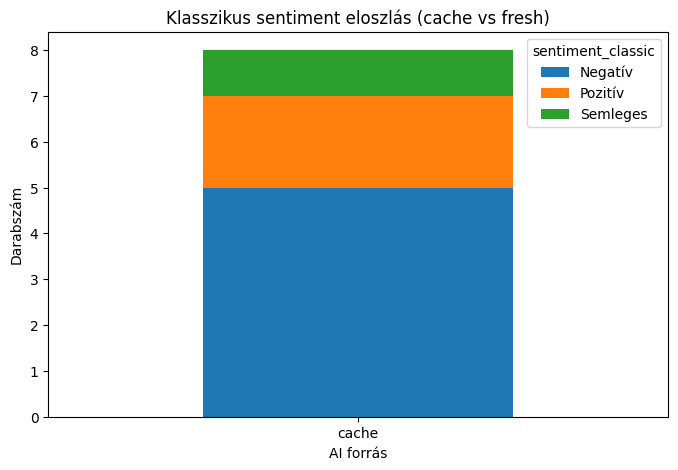


--- Rövid lista (összefoglalóval) ---


,title,sentiment_classic,sentiment_theme,summary_ai,ai_source
0,"=HYPERLINK(""https://www.origo.hu/nagyvilag/202...",Negatív,Aggodalom,Egy ártalmatlan vitából tragikus esemény alaku...,cache
1,"=HYPERLINK(""https://www.origo.hu/tudomany/2025...",Negatív,Aggodalom,Egy amerikai nagyvárost súlyosan érintett a hu...,cache
2,"=HYPERLINK(""https://www.origo.hu/sport/sport-e...",Negatív,Aggodalom,"A Ferencváros gyászolja legendás alakját, aki ...",cache
3,"=HYPERLINK(""https://www.origo.hu/sport/sport-e...",Negatív,Aggodalom,A világbajnok magyar testépítő temetése szívsz...,cache
4,"=HYPERLINK(""https://kultura.hu/remenyik-sandor...",Pozitív,Semlegesség,Reményik Sándor költészete a mai fiatalok szám...,cache
5,"=HYPERLINK(""https://hvg.hu/itthon/20250830_Mot...",Negatív,Aggodalom,"Csepelen motorbaleset történt, amelyben egy 23...",cache
6,"=HYPERLINK(""https://www.hirstart.hu/site/reloc...",Semleges,Aggodalom,Kádár János egykori titkos balatoni nyaralója ...,cache
7,"=HYPERLINK(""http://ujkor.hu/content/magassag-e...",Pozitív,Optimizmus,"Romsics Ignác monográfiája Kosáry Domokos, a 2...",cache


In [79]:
# -- 5. AI futtatás a találatokon --

# =======================================================
# 5. CELLÁBAN: Riport és vizualizáció
# =======================================================

#+++ Alap statisztika kiírása
print("Összes találat:", len(df))
print("Cache-ből jött:", (df["ai_source"] == "cache").sum())
print("Frissen elemzett:", (df["ai_source"] == "fresh").sum())

#+++ Csak cache-es hírek listázása
print("\n--- Csak cache-ből jött hírek ---")
display(df[df["ai_source"] == "cache"][["title", "sentiment_classic", "sentiment_theme"]].head())

#+++ Csak friss hírek listázása
print("\n--- Csak frissen elemzett hírek ---")
display(df[df["ai_source"] == "fresh"][["title", "sentiment_classic", "sentiment_theme"]].head())

#+++ Diagram: klasszikus sentiment eloszlás cache vs fresh bontásban
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.groupby(["ai_source", "sentiment_classic"]).size().unstack(fill_value=0).plot(
    kind="bar", stacked=True, figsize=(8,5)
)
plt.title("Klasszikus sentiment eloszlás (cache vs fresh)")
plt.ylabel("Darabszám")
plt.xlabel("AI forrás")
plt.xticks(rotation=0)
plt.show()

#+++ Rövid lista összefoglalókkal
print("\n--- Rövid lista (összefoglalóval) ---")
display(df[["title", "sentiment_classic", "sentiment_theme", "summary_ai", "ai_source"]].head(10))


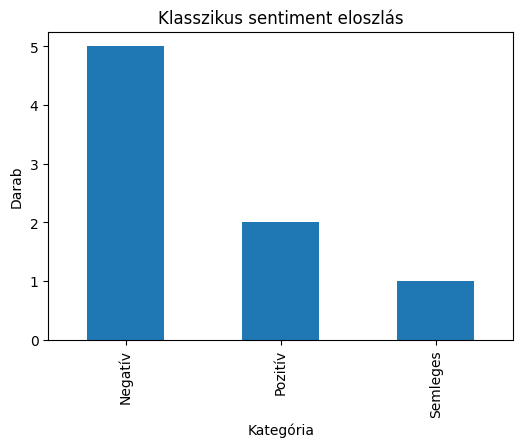

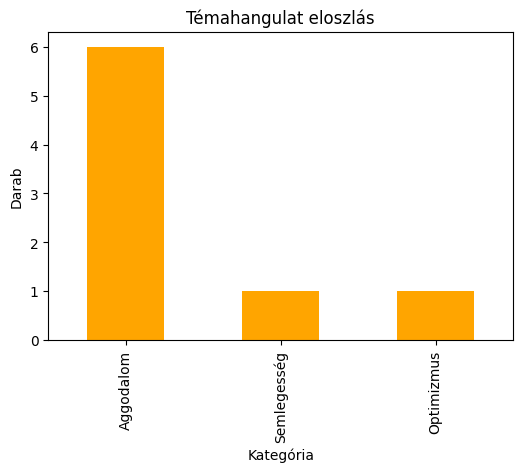

,title,sentiment_classic,sentiment_theme,summary_ai
0,"=HYPERLINK(""https://www.origo.hu/nagyvilag/202...",Negatív,Aggodalom,Egy ártalmatlan vitából tragikus esemény alaku...
1,"=HYPERLINK(""https://www.origo.hu/tudomany/2025...",Negatív,Aggodalom,Egy amerikai nagyvárost súlyosan érintett a hu...
2,"=HYPERLINK(""https://www.origo.hu/sport/sport-e...",Negatív,Aggodalom,"A Ferencváros gyászolja legendás alakját, aki ..."
3,"=HYPERLINK(""https://www.origo.hu/sport/sport-e...",Negatív,Aggodalom,A világbajnok magyar testépítő temetése szívsz...
4,"=HYPERLINK(""https://kultura.hu/remenyik-sandor...",Pozitív,Semlegesség,Reményik Sándor költészete a mai fiatalok szám...
5,"=HYPERLINK(""https://hvg.hu/itthon/20250830_Mot...",Negatív,Aggodalom,"Csepelen motorbaleset történt, amelyben egy 23..."
6,"=HYPERLINK(""https://www.hirstart.hu/site/reloc...",Semleges,Aggodalom,Kádár János egykori titkos balatoni nyaralója ...
7,"=HYPERLINK(""http://ujkor.hu/content/magassag-e...",Pozitív,Optimizmus,"Romsics Ignác monográfiája Kosáry Domokos, a 2..."


In [80]:
# -- 6. Vizualizáció --

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df["sentiment_classic"].value_counts().plot(kind="bar")
plt.title("Klasszikus sentiment eloszlás")
plt.xlabel("Kategória")
plt.ylabel("Darab")
plt.show()

plt.figure(figsize=(6,4))
df["sentiment_theme"].value_counts().plot(kind="bar", color="orange")
plt.title("Témahangulat eloszlás")
plt.xlabel("Kategória")
plt.ylabel("Darab")
plt.show()

df[["title","sentiment_classic","sentiment_theme","summary_ai"]].head(10)
